# Classification Exploration

## Data Processing and plotting functions

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.pipeline import make_pipeline
from matplotlib.colors import ListedColormap

def load_and_split_data(file_path, test_size=0.25, random_state=0):
    dataset = pd.read_csv(file_path)
    X = dataset.iloc[:, :-1].values
    y = dataset.iloc[:, -1].values
    return train_test_split(X, y, test_size=test_size, random_state=random_state)

def train_and_evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    return model, cm, accuracy, y_pred

def plot_confusion_matrix(cm, class_names, model_name):
    plt.figure(figsize=(10,7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.title(f'Confusion Matrix - {model_name}')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    
    if not os.path.exists('outputs'):
        os.makedirs('outputs')
    plt.savefig(f'outputs/{model_name.lower().replace(" ", "_")}_confusion_matrix.png')
    
    plt.show()

def plot_decision_boundary(X, y, model, set_name, model_name):
    X1, X2 = np.meshgrid(np.arange(start = X[:, 0].min() - 10, stop = X[:, 0].max() + 10, step = 0.5),
                         np.arange(start = X[:, 1].min() - 1000, stop = X[:, 1].max() + 1000, step = 0.5))
    
    colors = ['#0072B2', '#E69F00']  # Blue and orange (colorblind-friendly)
    
    plt.figure(figsize=(10,7))
    plt.contourf(X1, X2, model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                 alpha = 0.75, cmap = ListedColormap(colors))
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    
    for i, j in enumerate(np.unique(y)):
        plt.scatter(X[y == j, 0], X[y == j, 1], 
                    c = [colors[i]], edgecolors='black', label = j)
    
    plt.title(f'{model_name} Classification ({set_name})')
    plt.xlabel('Age')
    plt.ylabel('Estimated Salary')
    plt.legend()
    
    if not os.path.exists('outputs'):
        os.makedirs('outputs')
    plt.savefig(f'outputs/{model_name.lower().replace(" ", "_")}_decision_boundary_{set_name.lower().replace(" ", "_")}.png')
    
    plt.show()

# Load and split the data
X_train, X_test, y_train, y_test = load_and_split_data('raw_data/Social_Network_Ads.csv')

## Logistic Regression

Logistic Regression Results:
Accuracy: 0.89

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.96      0.92        68
           1       0.89      0.75      0.81        32

    accuracy                           0.89       100
   macro avg       0.89      0.85      0.87       100
weighted avg       0.89      0.89      0.89       100



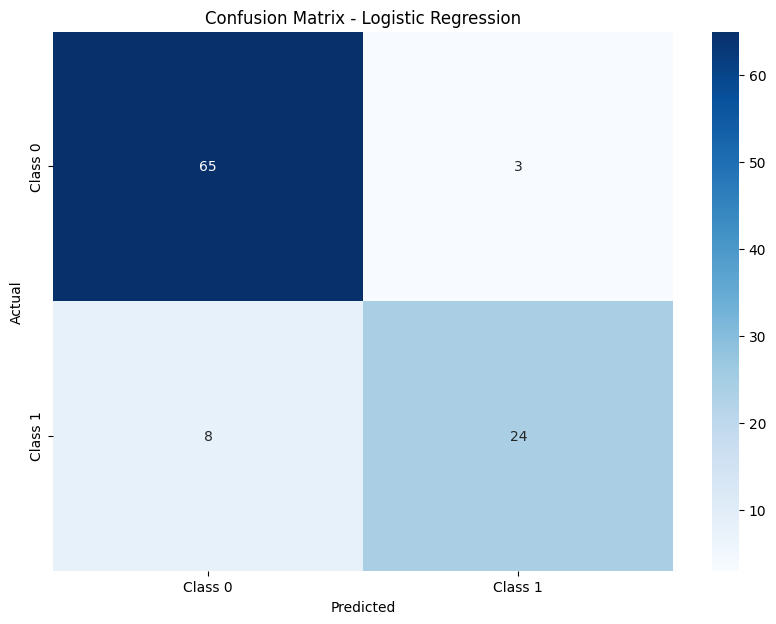

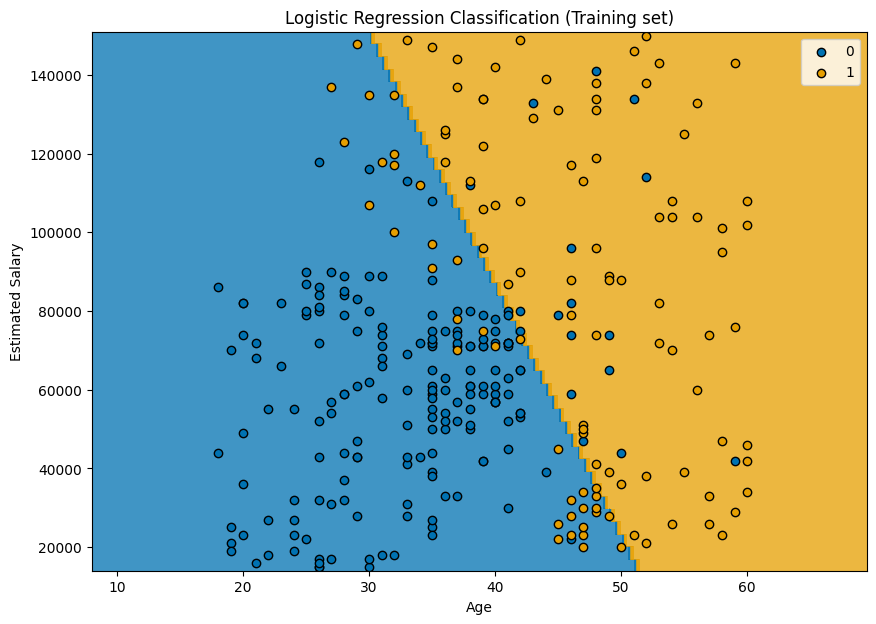

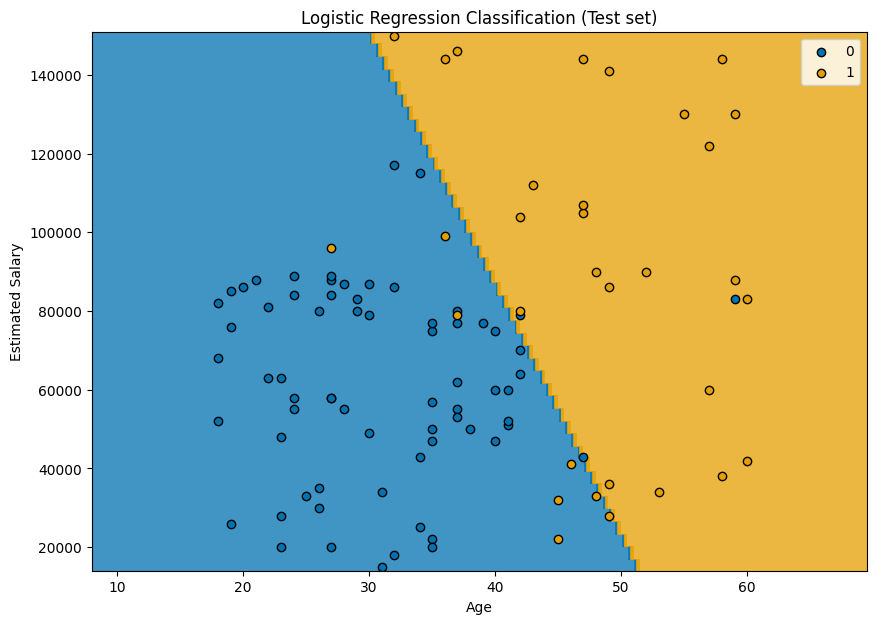

In [2]:
from sklearn.linear_model import LogisticRegression

def create_logistic_regression_model(random_state=0):
    return make_pipeline(StandardScaler(), LogisticRegression(random_state=random_state))

# Create and train the Logistic Regression model
model_lr = create_logistic_regression_model()
model_lr, cm_lr, accuracy_lr, y_pred_lr = train_and_evaluate_model(model_lr, X_train, X_test, y_train, y_test)

# Print results
print("Logistic Regression Results:")
print(f"Accuracy: {accuracy_lr}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr))

# Plot confusion matrix
plot_confusion_matrix(cm_lr, ['Class 0', 'Class 1'], 'Logistic Regression')

# Plot decision boundaries
plot_decision_boundary(X_train, y_train, model_lr, 'Training set', 'Logistic Regression')
plot_decision_boundary(X_test, y_test, model_lr, 'Test set', 'Logistic Regression')

## K-Nearest Neighbors (KNN)

K-Nearest Neighbors Results:
Accuracy: 0.93

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.94      0.95        68
           1       0.88      0.91      0.89        32

    accuracy                           0.93       100
   macro avg       0.92      0.92      0.92       100
weighted avg       0.93      0.93      0.93       100



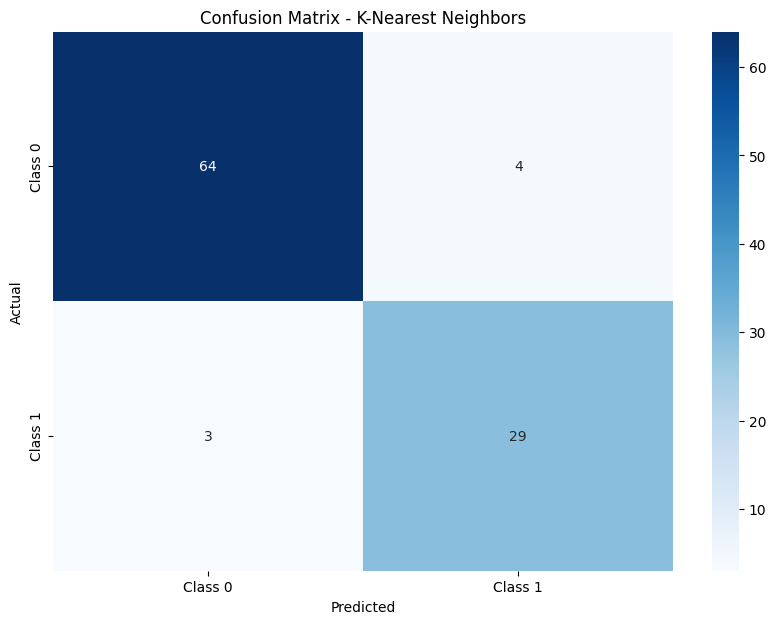

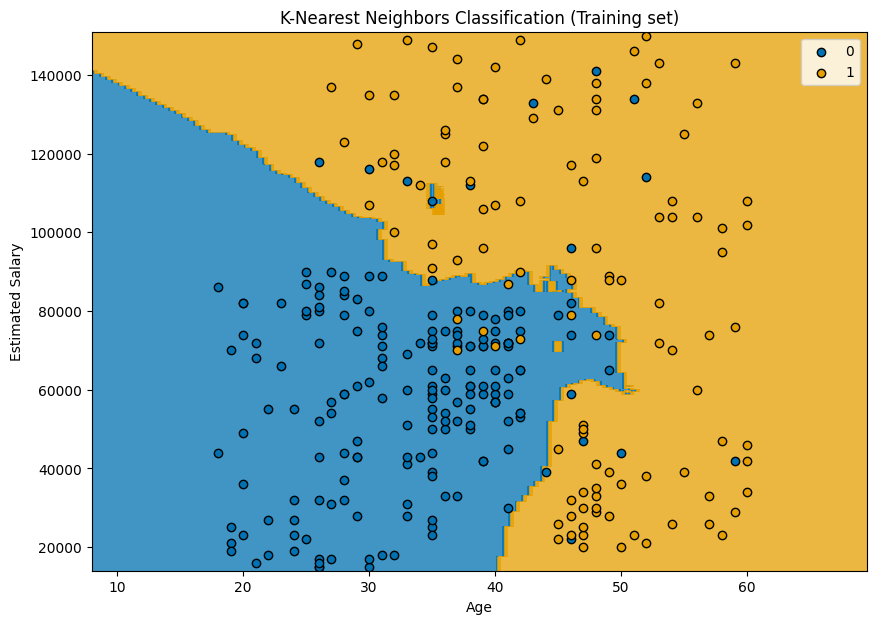

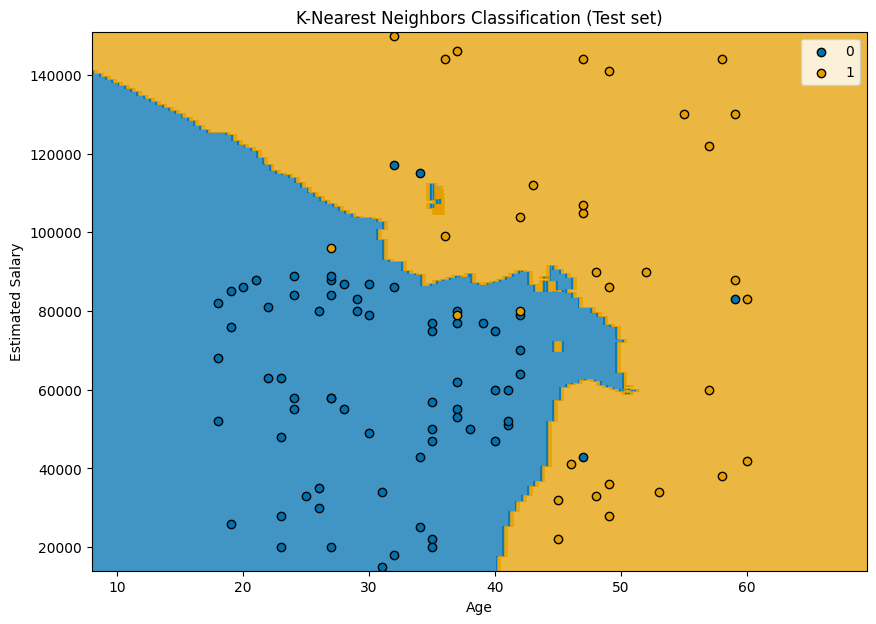

In [3]:
from sklearn.neighbors import KNeighborsClassifier

def create_knn_model(n_neighbors=5, metric='minkowski', p=2):
    return make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=n_neighbors, metric=metric, p=p))

# Create and train the K-NN model
model_knn = create_knn_model()
model_knn, cm_knn, accuracy_knn, y_pred_knn = train_and_evaluate_model(model_knn, X_train, X_test, y_train, y_test)

# Print results
print("K-Nearest Neighbors Results:")
print(f"Accuracy: {accuracy_knn}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_knn))

# Plot confusion matrix
plot_confusion_matrix(cm_knn, ['Class 0', 'Class 1'], 'K-Nearest Neighbors')

# Plot decision boundaries
plot_decision_boundary(X_train, y_train, model_knn, 'Training set', 'K-Nearest Neighbors')
plot_decision_boundary(X_test, y_test, model_knn, 'Test set', 'K-Nearest Neighbors')

## Support Vector Machines (SVM)

Support Vector Machine Results:
Accuracy: 0.9

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.97      0.93        68
           1       0.92      0.75      0.83        32

    accuracy                           0.90       100
   macro avg       0.91      0.86      0.88       100
weighted avg       0.90      0.90      0.90       100



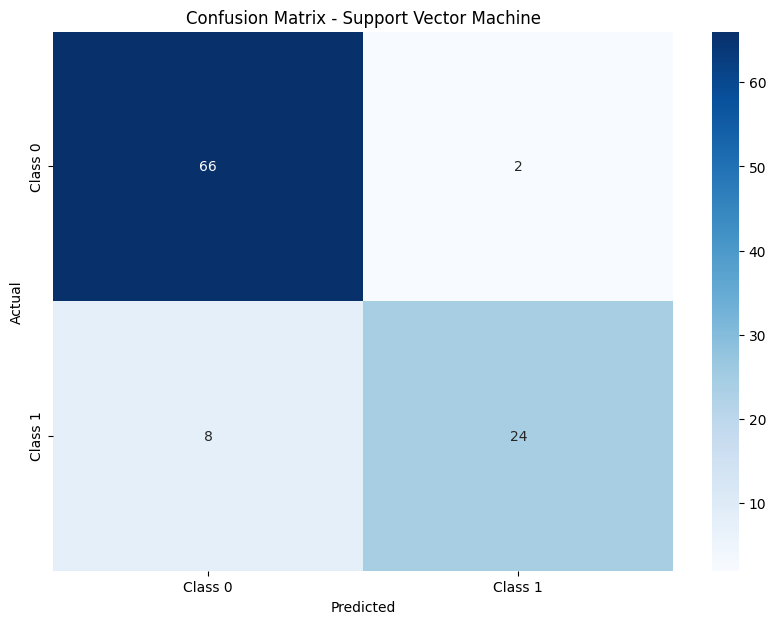

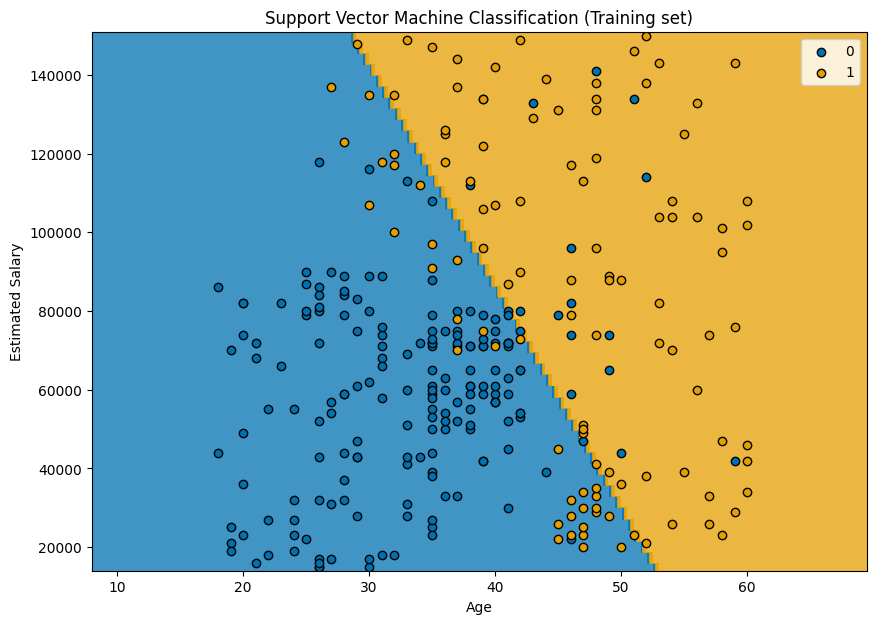

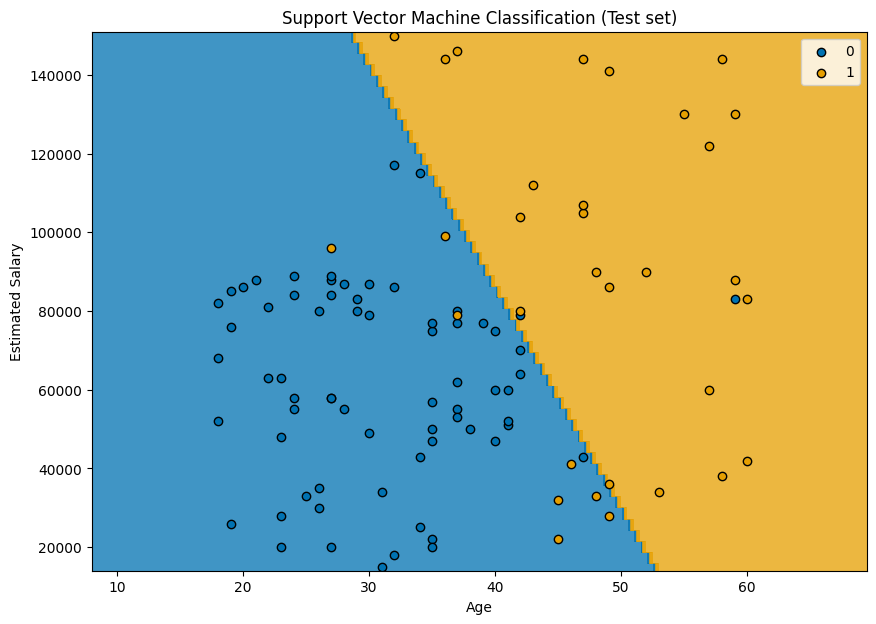

In [4]:
from sklearn.svm import SVC

def create_svm_model(kernel='linear', random_state=0):
    return make_pipeline(StandardScaler(), SVC(kernel=kernel, random_state=random_state))

# Create and train the SVM model
model_svm = create_svm_model()
model_svm, cm_svm, accuracy_svm, y_pred_svm = train_and_evaluate_model(model_svm, X_train, X_test, y_train, y_test)

# Print results
print("Support Vector Machine Results:")
print(f"Accuracy: {accuracy_svm}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_svm))

# Plot confusion matrix
plot_confusion_matrix(cm_svm, ['Class 0', 'Class 1'], 'Support Vector Machine')

# Plot decision boundaries
plot_decision_boundary(X_train, y_train, model_svm, 'Training set', 'Support Vector Machine')
plot_decision_boundary(X_test, y_test, model_svm, 'Test set', 'Support Vector Machine')

## Kernel SVM trick

Kernel SVM Results:
Accuracy: 0.93

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.94      0.95        68
           1       0.88      0.91      0.89        32

    accuracy                           0.93       100
   macro avg       0.92      0.92      0.92       100
weighted avg       0.93      0.93      0.93       100



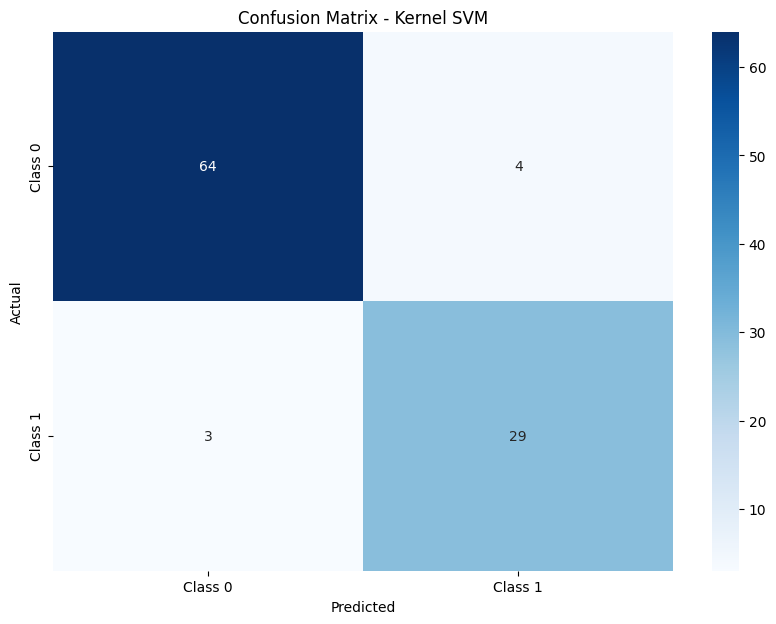

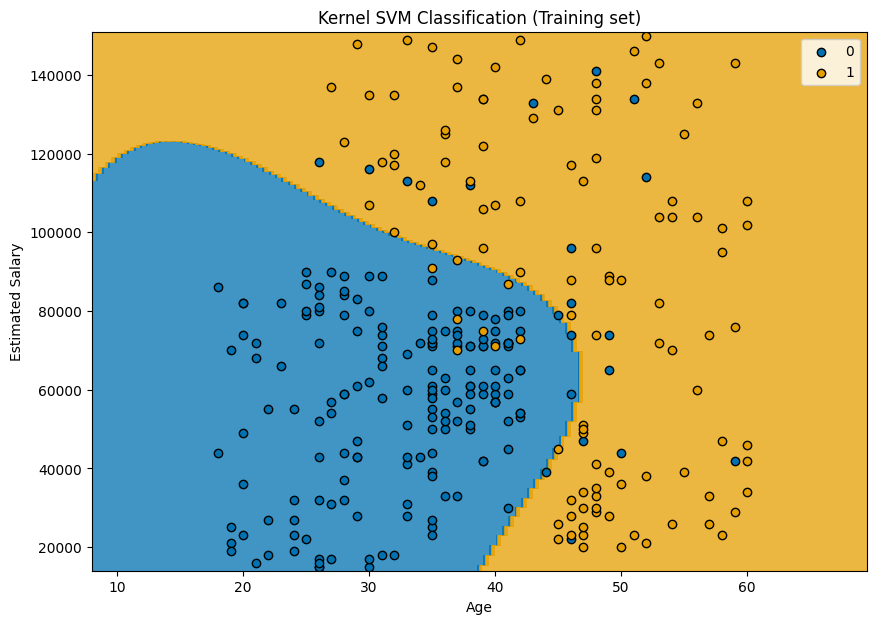

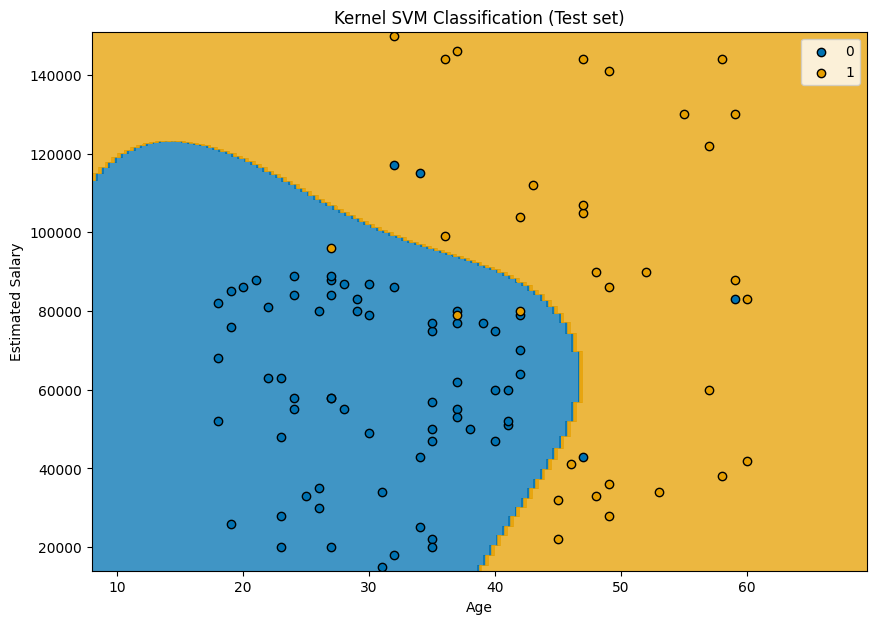

In [5]:
from sklearn.svm import SVC

def create_kernel_svm_model(kernel='rbf', random_state=0):
    return make_pipeline(StandardScaler(), SVC(kernel=kernel, random_state=random_state))

# Create and train the Kernel SVM model
model_kernel_svm = create_kernel_svm_model()
model_kernel_svm, cm_kernel_svm, accuracy_kernel_svm, y_pred_kernel_svm = train_and_evaluate_model(model_kernel_svm, X_train, X_test, y_train, y_test)

# Print results
print("Kernel SVM Results:")
print(f"Accuracy: {accuracy_kernel_svm}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_kernel_svm))

# Plot confusion matrix
plot_confusion_matrix(cm_kernel_svm, ['Class 0', 'Class 1'], 'Kernel SVM')

# Plot decision boundaries
plot_decision_boundary(X_train, y_train, model_kernel_svm, 'Training set', 'Kernel SVM')
plot_decision_boundary(X_test, y_test, model_kernel_svm, 'Test set', 'Kernel SVM')

## Naive Bayes

Naive Bayes Results:
Accuracy: 0.9

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.96      0.93        68
           1       0.89      0.78      0.83        32

    accuracy                           0.90       100
   macro avg       0.90      0.87      0.88       100
weighted avg       0.90      0.90      0.90       100



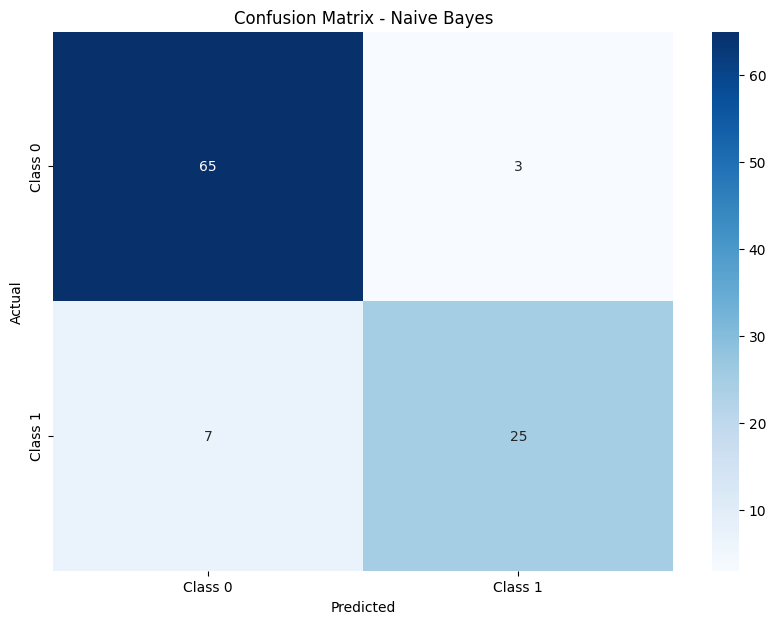

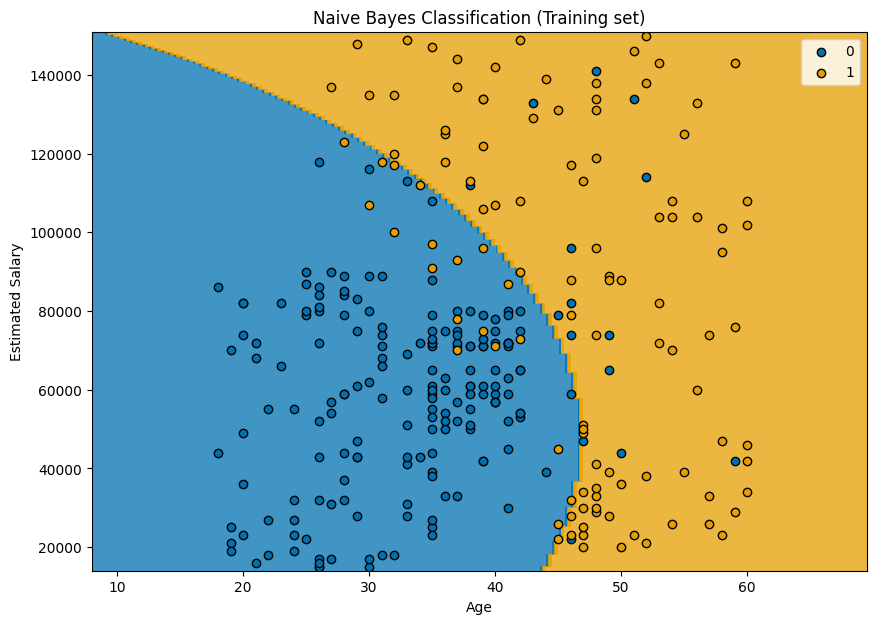

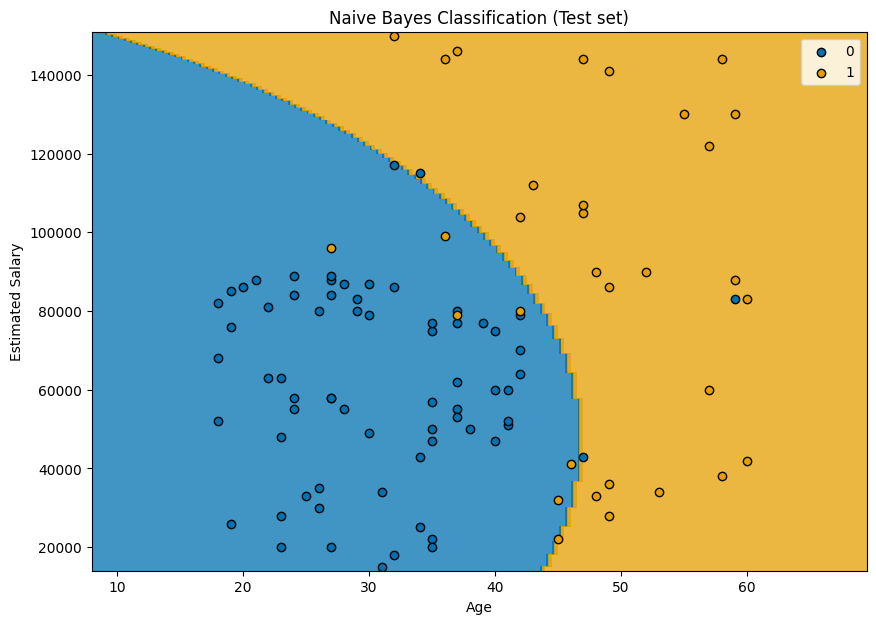

In [3]:
from sklearn.naive_bayes import GaussianNB

def create_naive_bayes_model():
    return make_pipeline(StandardScaler(), GaussianNB())

# Create and train the Naive Bayes model
model_nb = create_naive_bayes_model()
model_nb, cm_nb, accuracy_nb, y_pred_nb = train_and_evaluate_model(model_nb, X_train, X_test, y_train, y_test)

# Print results
print("Naive Bayes Results:")
print(f"Accuracy: {accuracy_nb}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_nb))

# Plot confusion matrix
plot_confusion_matrix(cm_nb, ['Class 0', 'Class 1'], 'Naive Bayes')

# Plot decision boundaries
plot_decision_boundary(X_train, y_train, model_nb, 'Training set', 'Naive Bayes')
plot_decision_boundary(X_test, y_test, model_nb, 'Test set', 'Naive Bayes')

## Decision Tree Classification

Decision Tree Results:
Accuracy: 0.91

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.91      0.93        68
           1       0.83      0.91      0.87        32

    accuracy                           0.91       100
   macro avg       0.89      0.91      0.90       100
weighted avg       0.91      0.91      0.91       100



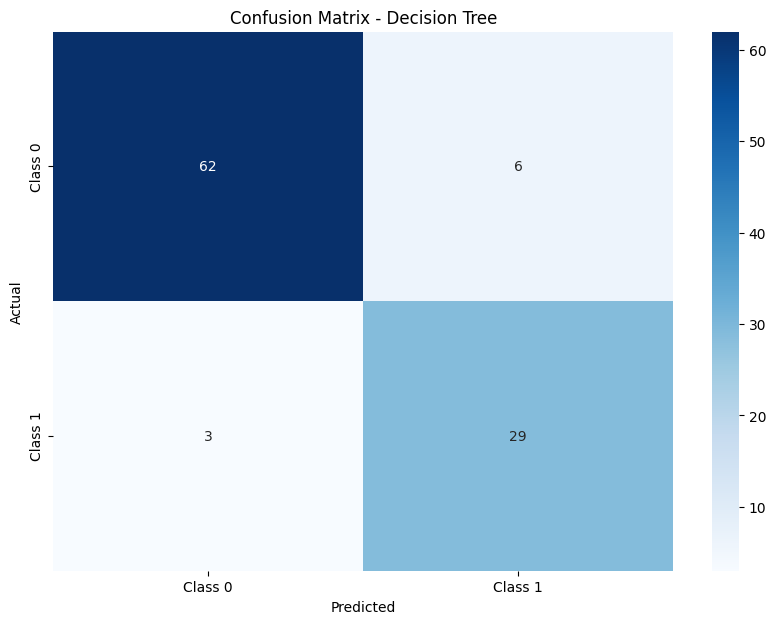

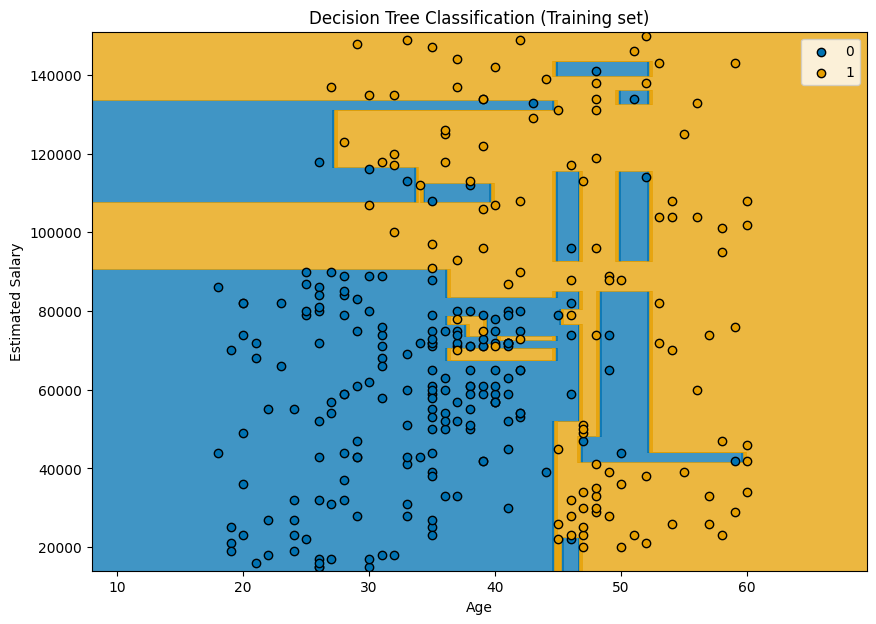

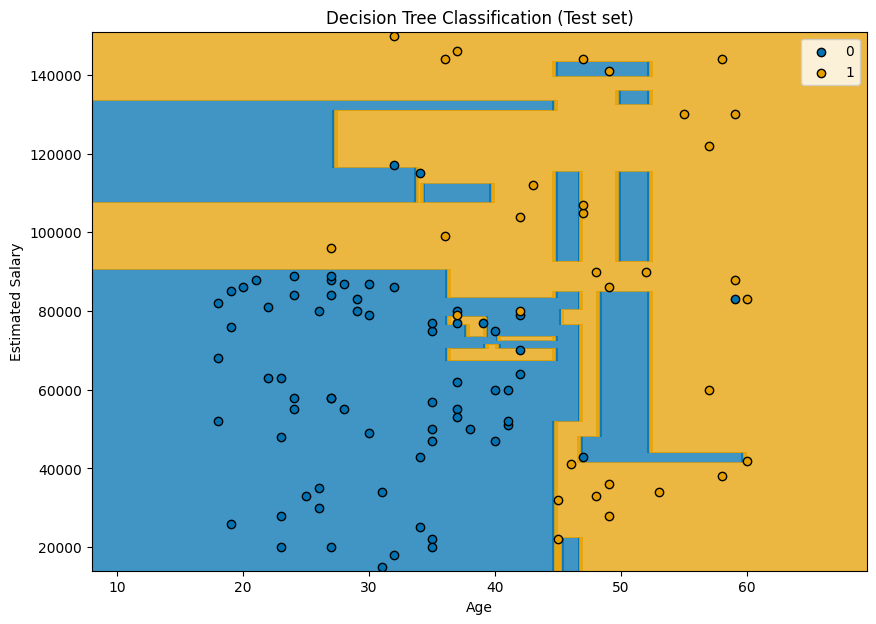

In [4]:
from sklearn.tree import DecisionTreeClassifier

def create_decision_tree_model(criterion='entropy', random_state=0):
    return make_pipeline(StandardScaler(), DecisionTreeClassifier(criterion=criterion, random_state=random_state))

# Create and train the Decision Tree model
model_dt = create_decision_tree_model()
model_dt, cm_dt, accuracy_dt, y_pred_dt = train_and_evaluate_model(model_dt, X_train, X_test, y_train, y_test)

# Print results
print("Decision Tree Results:")
print(f"Accuracy: {accuracy_dt}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt))

# Plot confusion matrix
plot_confusion_matrix(cm_dt, ['Class 0', 'Class 1'], 'Decision Tree')

# Plot decision boundaries
plot_decision_boundary(X_train, y_train, model_dt, 'Training set', 'Decision Tree')
plot_decision_boundary(X_test, y_test, model_dt, 'Test set', 'Decision Tree')

## Random Forest Classification

Random Forest Results:
Accuracy: 0.91

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.93      0.93        68
           1       0.85      0.88      0.86        32

    accuracy                           0.91       100
   macro avg       0.89      0.90      0.90       100
weighted avg       0.91      0.91      0.91       100



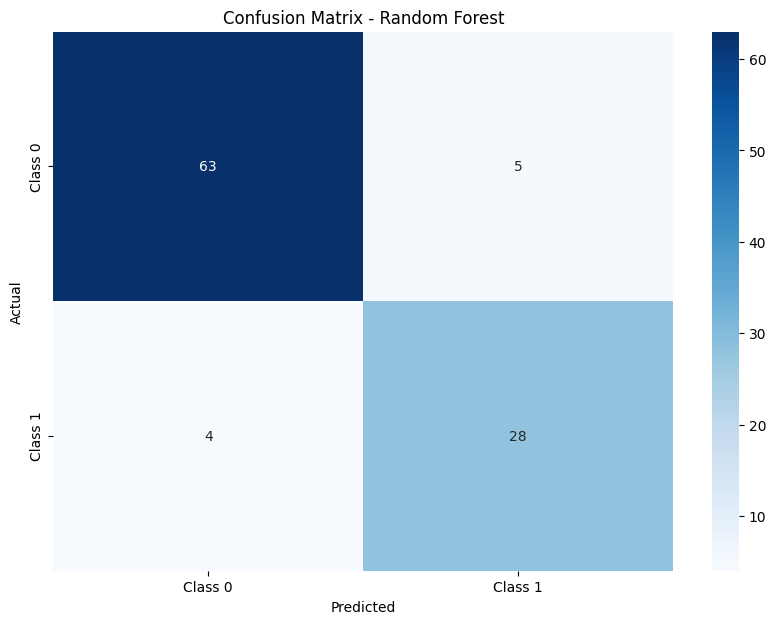

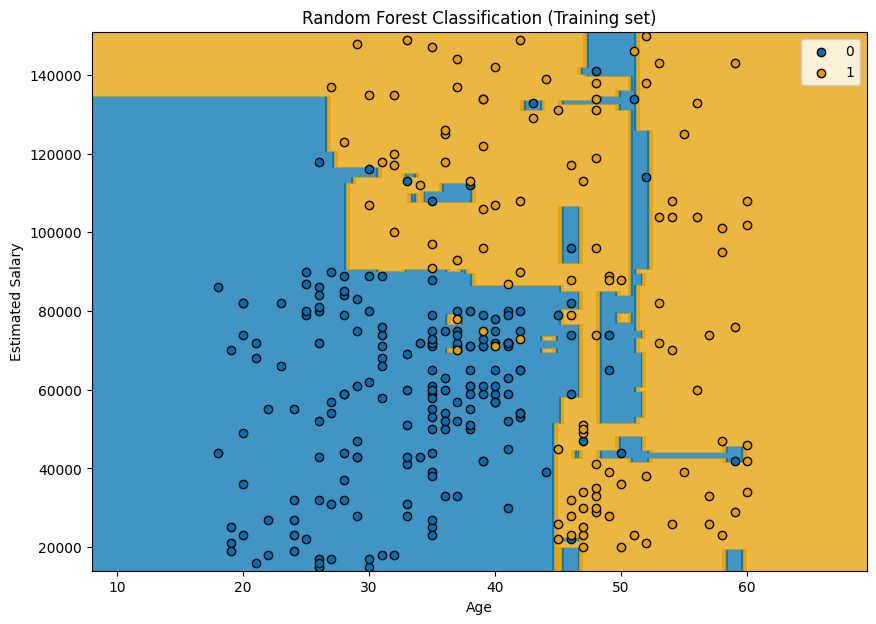

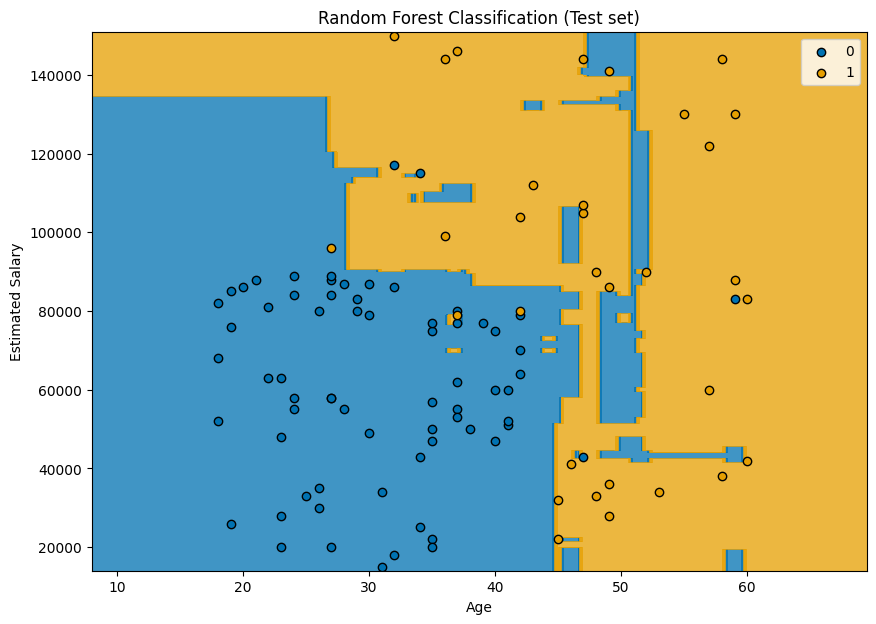

In [5]:
from sklearn.ensemble import RandomForestClassifier

def create_random_forest_model(n_estimators=10, criterion='entropy', random_state=0):
    return make_pipeline(StandardScaler(), RandomForestClassifier(n_estimators=n_estimators, criterion=criterion, random_state=random_state))

# Create and train the Random Forest model
model_rf = create_random_forest_model()
model_rf, cm_rf, accuracy_rf, y_pred_rf = train_and_evaluate_model(model_rf, X_train, X_test, y_train, y_test)

# Print results
print("Random Forest Results:")
print(f"Accuracy: {accuracy_rf}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

# Plot confusion matrix
plot_confusion_matrix(cm_rf, ['Class 0', 'Class 1'], 'Random Forest')

# Plot decision boundaries
plot_decision_boundary(X_train, y_train, model_rf, 'Training set', 'Random Forest')
plot_decision_boundary(X_test, y_test, model_rf, 'Test set', 'Random Forest')